In [97]:
options(warn=-1)
# install.packages("igraph", type="binary")
library(igraph)

### Question 1. Create random networks using Erdös-Rényi (ER) model

#### 1.(a) Create an undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.  <br> 1.(b) For each p and n = 1000, answer the following questions: Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?

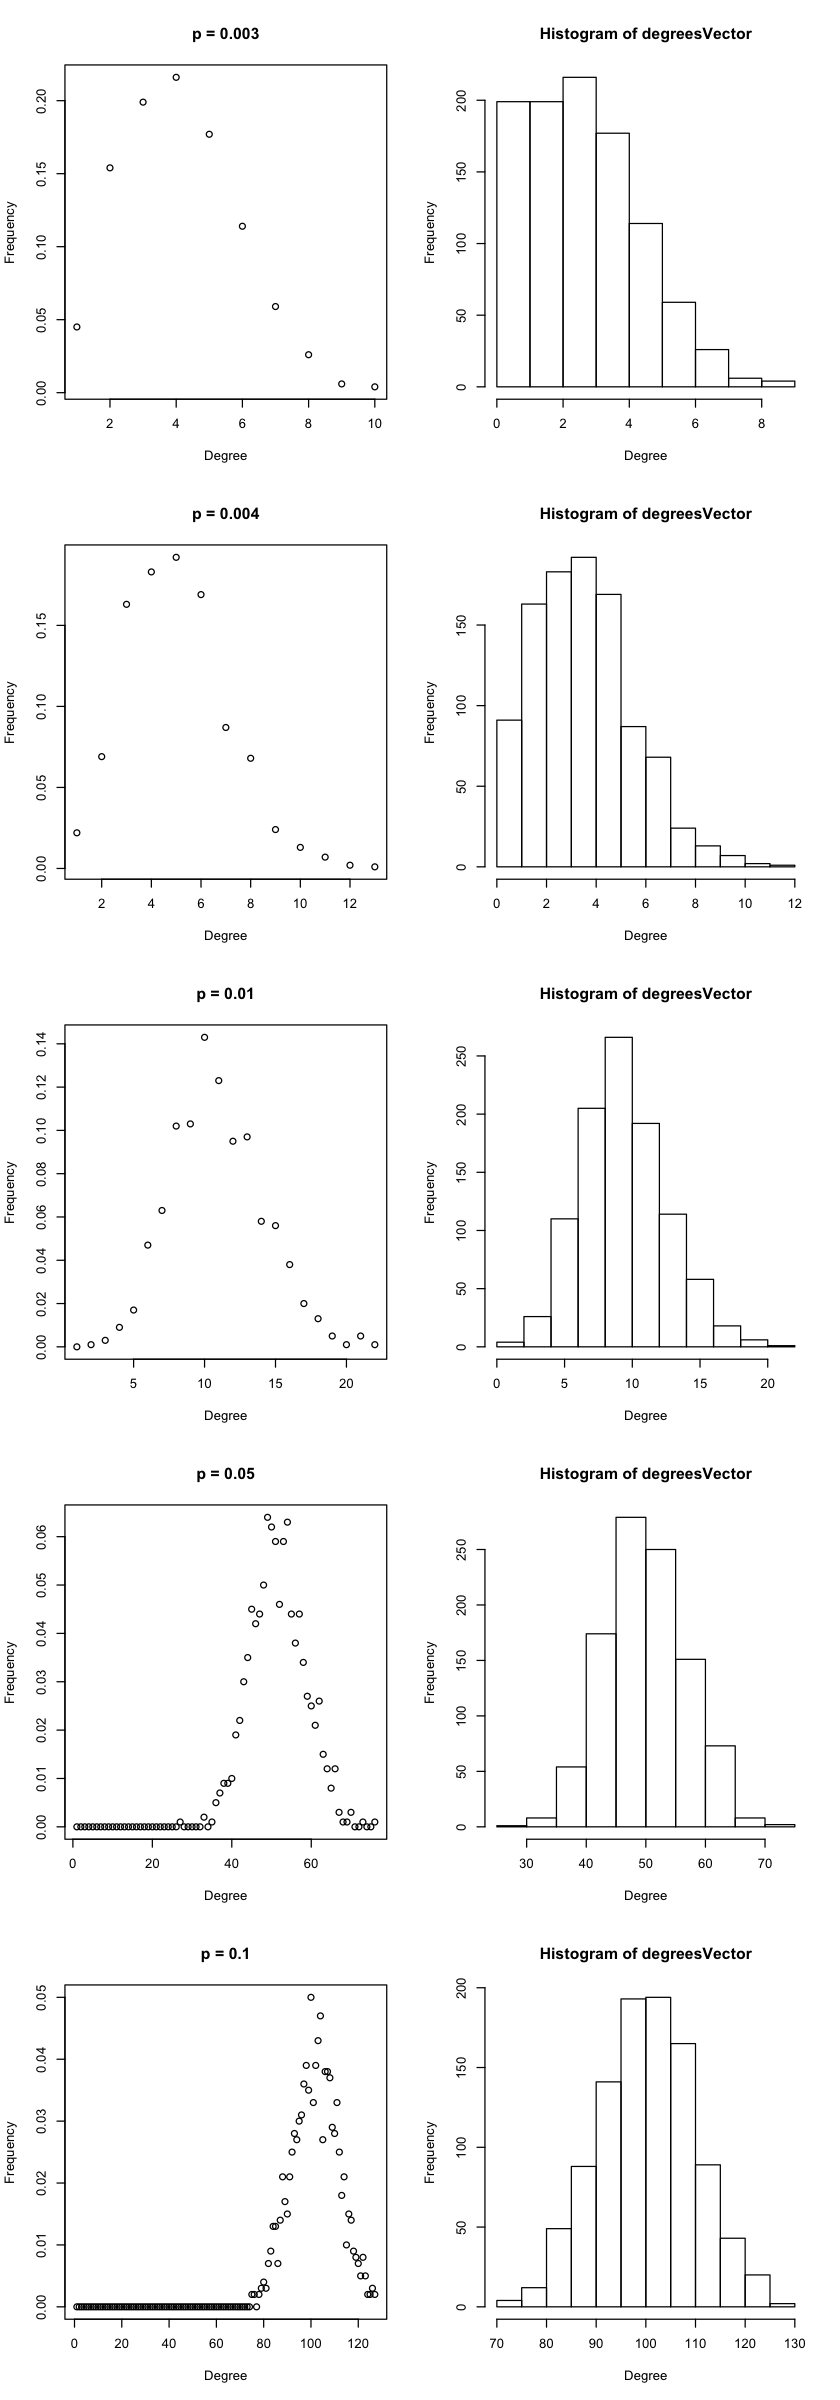

In [98]:
n <- 1000
p <- c(0.003, 0.004, 0.01, 0.05, 0.1)

mat <- matrix(, nrow = 8, ncol = 6)
mat[1, 1] <- "p"
mat[2, 1] <- "mean_theo"
mat[3, 1] <- "mean"
mat[4, 1] <- "var_theo"
mat[5, 1] <- "var"
mat[6, 1] <- "connectivity"
mat[7, 1] <- "diameter"
mat[8, 1] <- "gcc size"
mat[1, 2:6] <- p
mat[2, 2:6] <- n*p
mat[4, 2:6] <- n*p*(1-p)

par(mfrow=c(5, 2))
options(repr.plot.width=7, repr.plot.height=20)
for (i in seq_along(p)) {
    g <- erdos.renyi.game(n, p[i], directed=F)
    plot(degree.distribution(g), xlab="Degree",ylab="Frequency",
         main=paste0("p = ", p[i]))
    degreesVector <- degree(g)
    hist(degreesVector, xlab="Degree",ylab="Frequency")
    
    mat[3, i+1] <- round(mean(degreesVector), digits=4)
    mat[5, i+1] <- round(var(degreesVector), digits=4)
    mat[6, i+1] <- is.connected(g)
    g.components <- clusters(g)
    ix <- max(g.components$csize)
    mat[8, i+1] <- ix  
    if (!is.connected(g)) {
        g.giant <- induced.subgraph(g, which(g.components$membership == which.max(g.components$csize)))
        mat[7, i+1] <- round(diameter(g.giant), digits=4)
    }
}

In [17]:
print(mat)

     [,1]           [,2]     [,3]     [,4]     [,5]      [,6]     
[1,] "p"            "0.003"  "0.004"  "0.01"   "0.05"    "0.1"    
[2,] "mean_theo"    "3"      "4"      "10"     "50"      "100"    
[3,] "mean"         "2.974"  "4"      "10.084" "50.146"  "99.99"  
[4,] "var_theo"     "2.991"  "3.984"  "9.9"    "47.5"    "90"     
[5,] "var"          "2.8462" "3.9399" "9.2762" "45.6924" "92.4664"
[6,] "connectivity" "FALSE"  "FALSE"  "TRUE"   "TRUE"    "TRUE"   
[7,] "diameter"     "14"     "11"     NA       NA        NA       
[8,] "gcc size"     "947"    "980"    "1000"   "1000"    "1000"   


#### 1. (c) It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly nonlinear function of p, with interesting properties occurring for values where p = O(ln n /n). For n = 1000, sweep over values of p in this region and create 100 random networks for each p. Then scatter plot the normalized GCC sizes vs p. Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?

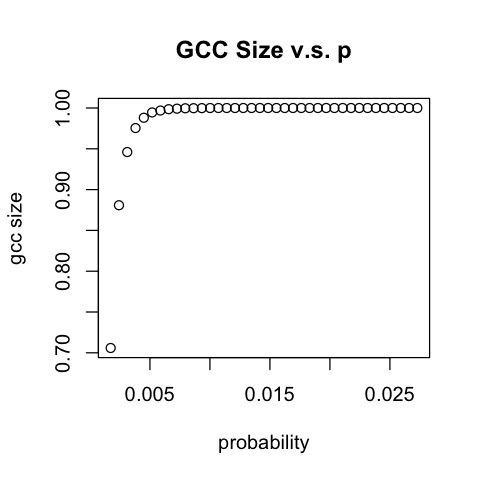

In [102]:
gcc_mean = c()
n <- 1000
p <- log(n) / n
p_seq <- seq(p/4, p*2, by=p/10)

for (n in seq_along(p_seq)) {
    gcc_size <- 0
    gcc = c()
    for (i in 1:100) {
        g <- erdos.renyi.game(1000, p_seq[n], directed=F)
        g.components <- clusters(g)
        g.ix <- max(g.components$csize)
        gcc = c(gcc, g.ix)
    }
    gcc_mean = c(gcc_mean, mean(gcc))
}

options(repr.plot.width=4, repr.plot.height=4)
plot(p_seq, gcc_mean/1000, xlab="probability", ylab="gcc size", main="GCC Size v.s. p")


#### 1.(d) i. Define the average degree of nodes c = n * p = 0.5. Sweep over number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

In [13]:
myfunction = function(c){
    n <- seq(100, 10000, by = 50)
    p_seq = c/n
    gcc_mean = c()
    for (k in seq_along(p_seq)) {
        gcc_size <- 0
        gcc = c()
        for (i in 1:100) {
            g <- erdos.renyi.game(n[k], p_seq[k], directed=F)
            g.components <- clusters(g)
            g.ix <- max(g.components$csize)
            gcc = c(gcc, g.ix)
        }
        gcc_mean = c(gcc_mean, mean(gcc))
    }
#     options(repr.plot.width=4, repr.plot.height=4)
#     plot(p_seq, gcc_mean, xlab="probability", ylab="gcc size", 
#          main=sprintf("c = %s", c))
    return(list(p_seq, gcc_mean))
}

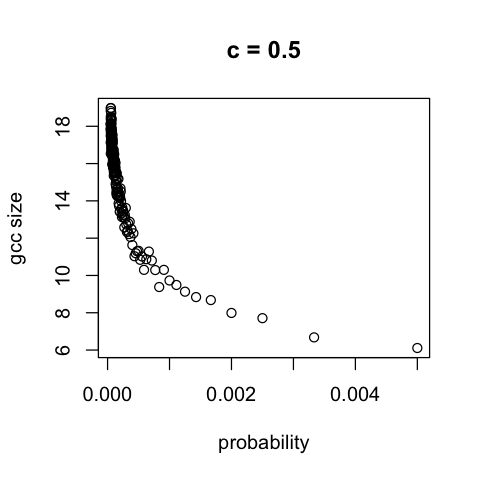

In [16]:
list_val = myfunction(0.5)
options(repr.plot.width=4, repr.plot.height=4)
plot(list_val[[1]], list_val[[2]], xlab="probability", ylab="gcc size", main="c = 0.5")

#### 1.(d) ii. Repeat the same for c = 1.

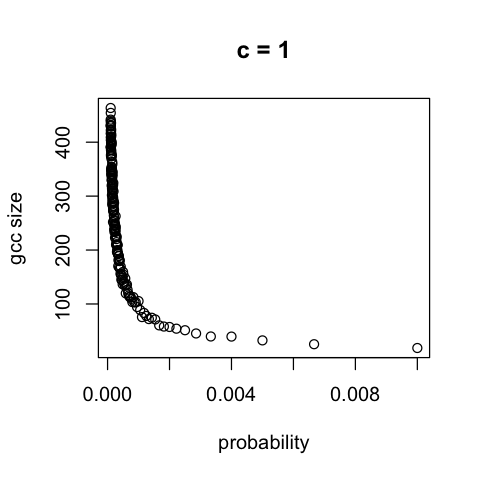

In [17]:
list_val = myfunction(1)
options(repr.plot.width=4, repr.plot.height=4)
plot(list_val[[1]], list_val[[2]], xlab="probability", ylab="gcc size", main="c = 1")

#### 1.(d) iii Repeat the same for values of c = 1.1; 1.2; 1.3, and show the results for these three values in a single plot.

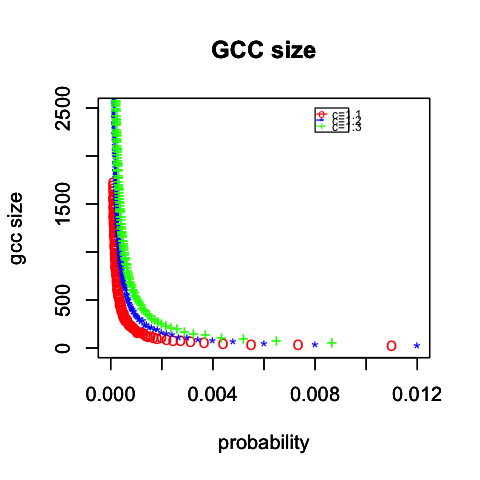

In [20]:
cs <- c(1.1, 1.2, 1.3)
color <- c("red", "blue", "green")
pch <- c("o", "*", "+")

options(repr.plot.width=4, repr.plot.height=4)
for (i in seq_along(cs)) {
    list_val = myfunction(cs[i])
    plot(list_val[[1]], list_val[[2]], pch=pch[i], col=color[i], 
         ylim=c(0,2500), xlim=c(0, 12)*0.001,
         ylab="gcc size", xlab="probability", main="GCC size")
    par(new=TRUE)
}
legend(0.008, 2500, legend=c("c=1.1","c=1.2","c=1.3"), col=color, 
       pch=pch, lty=c(1,2,3), ncol=1, cex=0.6)

### Question 2. Create networks using preferential attachment model

#### 2.(a) Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [22]:
n1 = 1000
g1 <- barabasi.game(n1, m=1, directed=F)
print(is.connected(g1))

[1] TRUE


#### 2.(b) Use fast greedy method to find the community structure. Measure modularity.

In [5]:
g1.fg <- fastgreedy.community(g1)
g1.cmsize <- sizes(fastgreedy.community(g1))
print(g1.cmsize)
print(sprintf("modularity: %s", modularity(g1, membership(g1.fg))))

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
43 49 42 41 40 41 38 38 37 36 36 36 34 35 32 35 44 28 35 30 27 23 25 30 20 21 
27 28 29 30 31 32 
19 17 18 17 18 15 
[1] "modularity: 0.934740546352158"


#### 2.(c) Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

In [46]:
n2 = 10000
g2 <- barabasi.game(n2, m=1, directed=F)
g2.fg <- fastgreedy.community(g2)
g2.cmsize <- sizes(g2.fg)
# print(cmsize)
print(sprintf("modularity: %s", modularity(g2, membership(g2.fg))))

[1] "modularity: 0.978069734166136"


#### 2.(d) Plot the degree distribution in a log-log scale for both n = 1000; 10000, then estimate the slope of the plot.

 (Intercept)           x1 
 0.136686667 -0.008262609 
 (Intercept)           x2 
 0.054987468 -0.001202435 


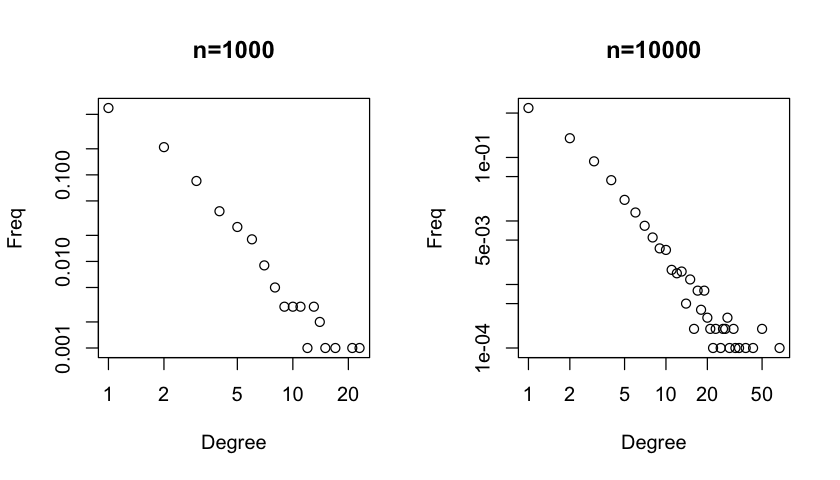

In [48]:
g1.dd <- degree.distribution(g1) 
x1 <- seq(0, max(degree(g1)), 1)
x1_length <- length(x1);
g2.dd <- degree.distribution(g2) 
x2 <- seq(0, max(degree(g2)), 1)
x2_length <- length(x2);

par(mfrow = c(1, 2))
options(repr.plot.width=7, repr.plot.height=4)
plot(x1, g1.dd, xlab="Degree", ylab="Freq", main="n=1000", log = "xy")
plot(x2, g2.dd, xlab="Degree", ylab="Freq", main="n=10000", log = "xy")

print(lm(g1.dd ~ x1)$coefficients)
print(lm(g2.dd ~ x2)$coefficients)

#### 2.(e) You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

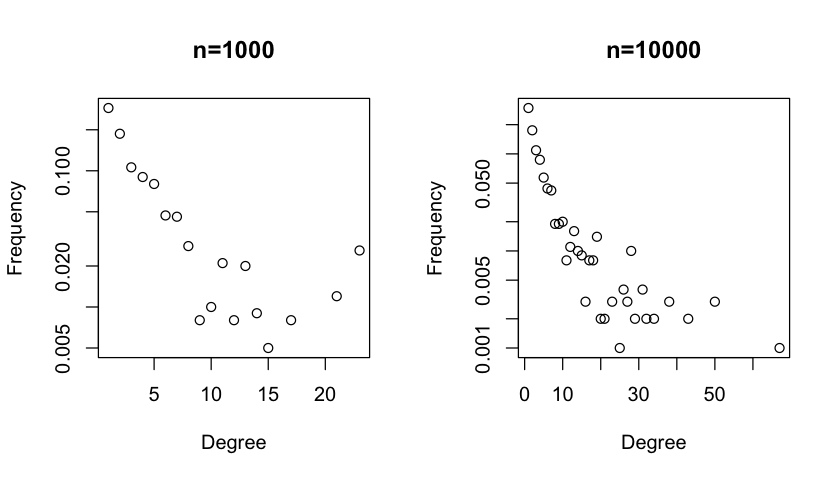

In [75]:
degree_array = vector(mode = "integer", 1000)
for (i in 1:1000) {
    node_i <- sample(1:1000, 1)
    i.neighbors <- neighbors(g1, node_i)
    node_j <- sample(i.neighbors, 1)
    degree_array[i] <- degree(g1, node_j)
}
g1.hist = hist(degree_array, breaks=seq(min(degree_array)-0.5, max(degree_array)+0.5, by=1), plot=FALSE)

degree_array = vector(mode = "integer", 1000)
for (i in 1:1000) {
    node_i <- sample(1:10000, 1)
    i.neighbors <- neighbors(g2, node_i)
    node_j <- sample(i.neighbors, 1)
    degree_array[i] <- degree(g2, node_j)
}
g2.hist = hist(degree_array, breaks=seq(min(degree_array)-0.5, max(degree_array)+0.5, by=1), plot=FALSE)

par(mfrow = c(1, 2))
options(repr.plot.width=7, repr.plot.height=4)
plot(g1.hist$mids, g1.hist$density, log="y", xlab="Degree", ylab="Frequency", main="n=1000")
plot(g2.hist$mids, g2.hist$density, log="y", xlab="Degree", ylab="Frequency", main="n=10000")

#### 2.(f) Estimate the expected degree of a node that is added at time step i for 1 <= i <= 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

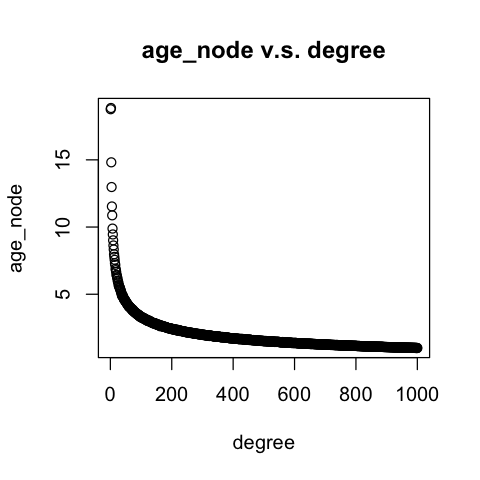

In [93]:
g <- barabasi.game(1000, m=1, directed=F)
degreeCount <- degree(g)

for(k in 1:10000){
    g <- barabasi.game(1000, m=1, directed=F)
    degreeCount <- degreeCount + degree(g) 
}
options(repr.plot.width=4, repr.plot.height=4)
avgDegreeCount <- degreeCount/10001
plot(V(g), avgDegreeCount, xlab="degree", ylab="age_node", main="age_node v.s. degree")

#### 2.(g) Repeat the previous parts for m = 2; and m = 5. Why was modularity for m = 1 high?

In [94]:
myFunction2 = function(m) {
    # part a, b
    n1 = 1000
    g1 <- barabasi.game(n1, m=m, directed=F)
    g1.fg <- fastgreedy.community(g1)
    g1.cmsize <- sizes(fastgreedy.community(g1))
    print(sprintf("For m = %s and n = %s, modularity: %s", m, n1, modularity(g1, membership(g1.fg))))
    
    # part c
    n2 = 10000
    g2 <- barabasi.game(n2, m=m, directed=F)
    g2.fg <- fastgreedy.community(g2)
    g2.cmsize <- sizes(g2.fg)
    print(sprintf("For m = %s and n = %s, modularity: %s", m, n2, modularity(g2, membership(g2.fg))))
    
    # part d
    g1.dd <- degree.distribution(g1) 
    x1 <- seq(0, max(degree(g1)), 1)
    g2.dd <- degree.distribution(g2) 
    x2 <- seq(0, max(degree(g2)), 1)

    par(mfrow = c(3, 2))
    options(repr.plot.width=7, repr.plot.height=12)
    plot(x1, g1.dd, xlab="Degree", ylab="Freq", main="n=1000 deg_dis", log = "xy")
    plot(x2, g2.dd, xlab="Degree", ylab="Freq", main="n=10000 deg_dis", log = "xy")
    
    print(lm(g1.dd ~ x1)$coefficients)
    print(lm(g2.dd ~ x2)$coefficients)
    
    # part e
    degree_array = vector(mode = "integer", 1000)
    for (i in 1:1000) {
        node_i <- sample(1:1000, 1)
        i.neighbors <- neighbors(g1, node_i)
        node_j <- sample(i.neighbors, 1)
        degree_array[i] <- degree(g1, node_j)
    }
    g1.hist = hist(degree_array, breaks=seq(min(degree_array)-0.5, max(degree_array)+0.5, by=1), plot=FALSE)

    degree_array = vector(mode = "integer", 1000)
    for (i in 1:1000) {
        node_i <- sample(1:10000, 1)
        i.neighbors <- neighbors(g2, node_i)
        node_j <- sample(i.neighbors, 1)
        degree_array[i] <- degree(g2, node_j)
    }
    g2.hist = hist(degree_array, breaks=seq(min(degree_array)-0.5, max(degree_array)+0.5, by=1), plot=FALSE)

    plot(g1.hist$mids, g1.hist$density, log="y", xlab="Degree", ylab="Frequency", main="n=1000 ran_node")
    plot(g2.hist$mids, g2.hist$density, log="y", xlab="Degree", ylab="Frequency", main="n=10000 ran_node")

    # part f
    g <- barabasi.game(1000, m=m, directed=F)
    degreeCount <- degree(g)

    for(k in 1:10000){
        g <- barabasi.game(1000, m=m, directed=F)
        degreeCount <- degreeCount + degree(g) 
    }
    avgDegreeCount <- degreeCount/10001
    plot(V(g), avgDegreeCount, xlab="degree", ylab="age_node", main="age_node v.s. degree")
}

[1] "For m = 2 and n = 1000, modularity: 0.529252817634063"
[1] "For m = 2 and n = 10000, modularity: 0.529654561951358"
 (Intercept)           x1 
 0.070593537 -0.002117455 
  (Intercept)            x2 
 0.0336231982 -0.0004475307 


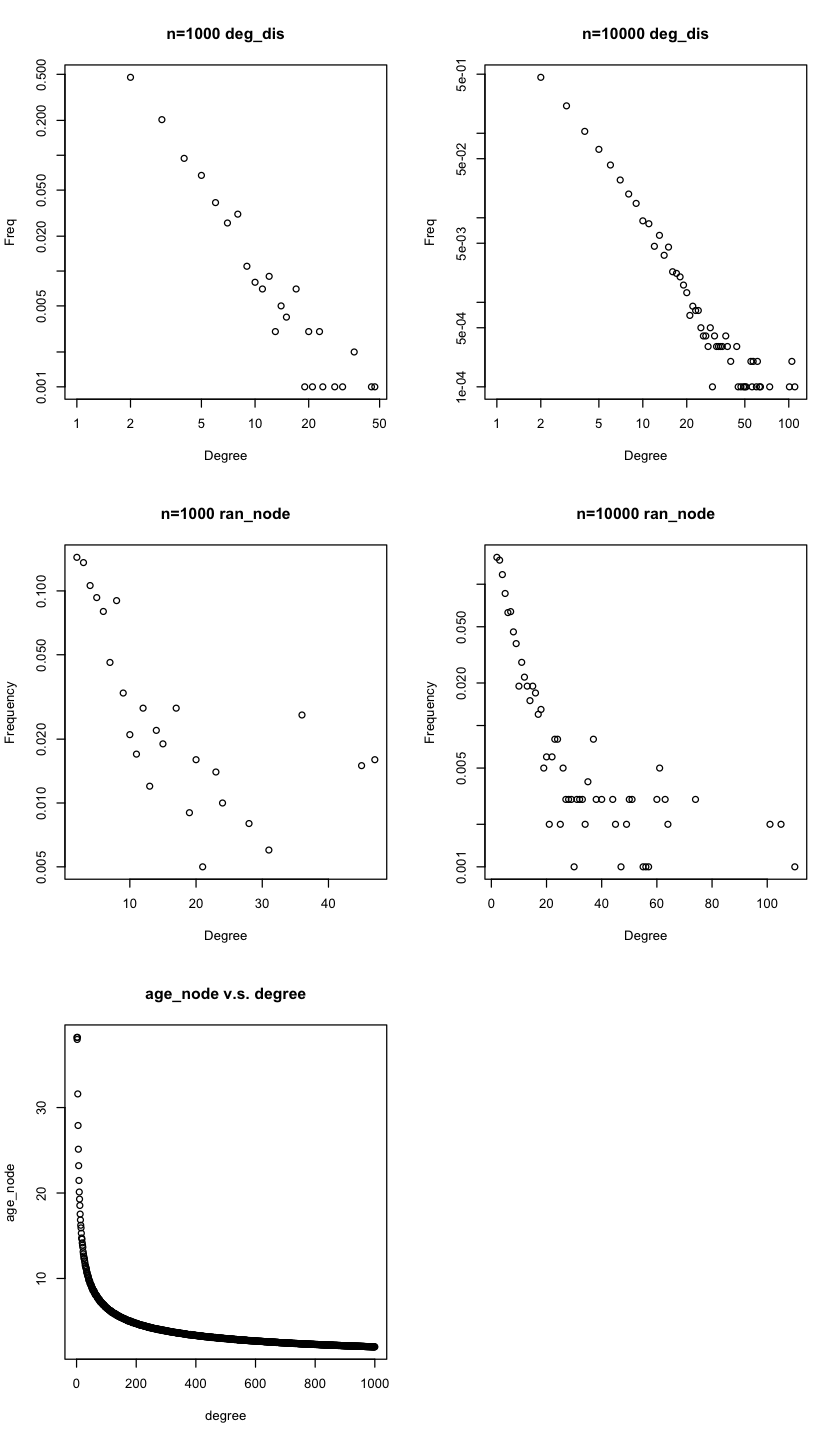

In [95]:
myFunction2(2)

[1] "For m = 5 and n = 1000, modularity: 0.278136837795231"
[1] "For m = 5 and n = 10000, modularity: 0.27631963531242"
  (Intercept)            x1 
 0.0312076731 -0.0004080252 
  (Intercept)            x2 
 1.049238e-02 -4.267289e-05 


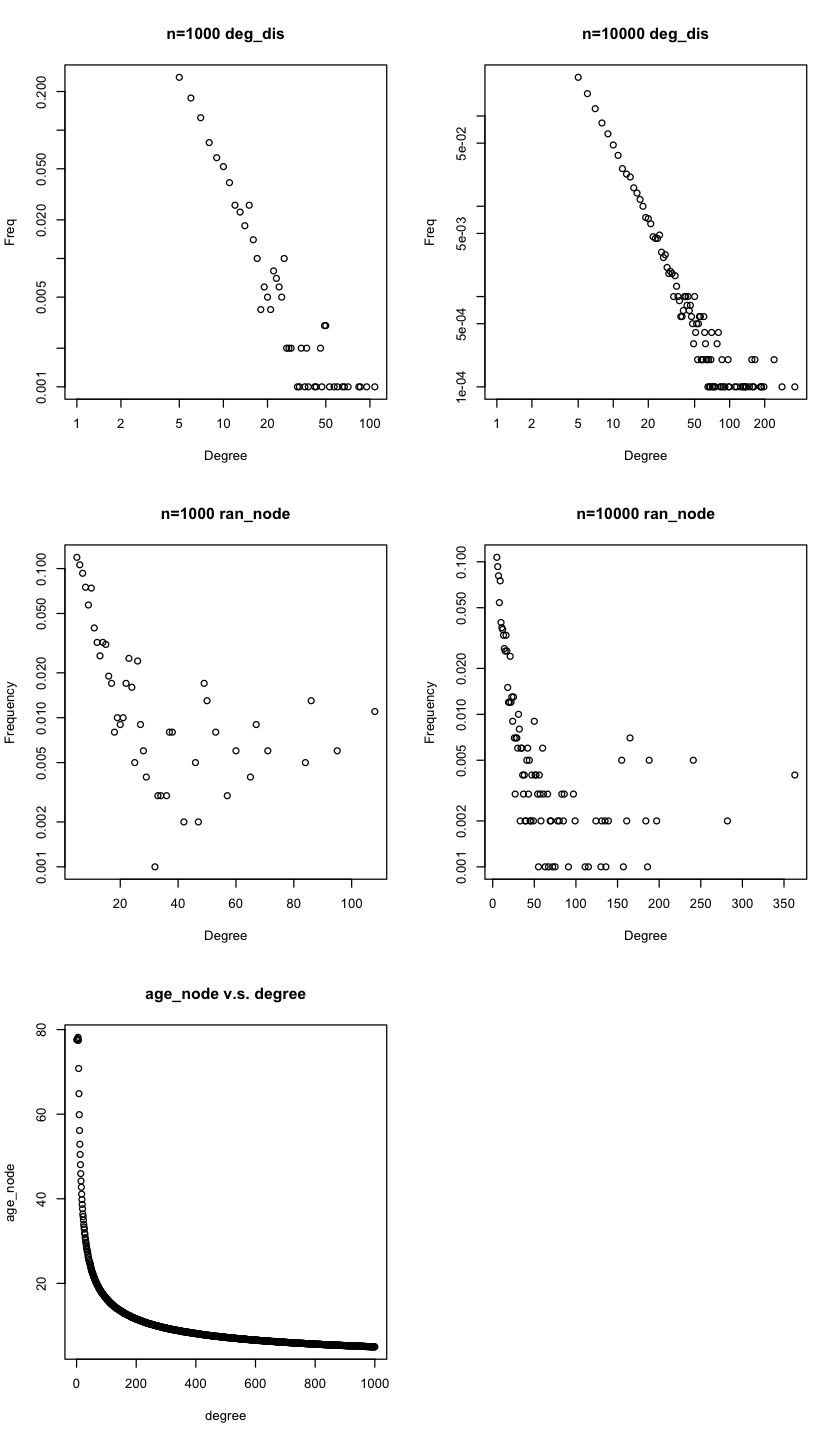

In [96]:
myFunction2(5)

#### 2.(h) Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

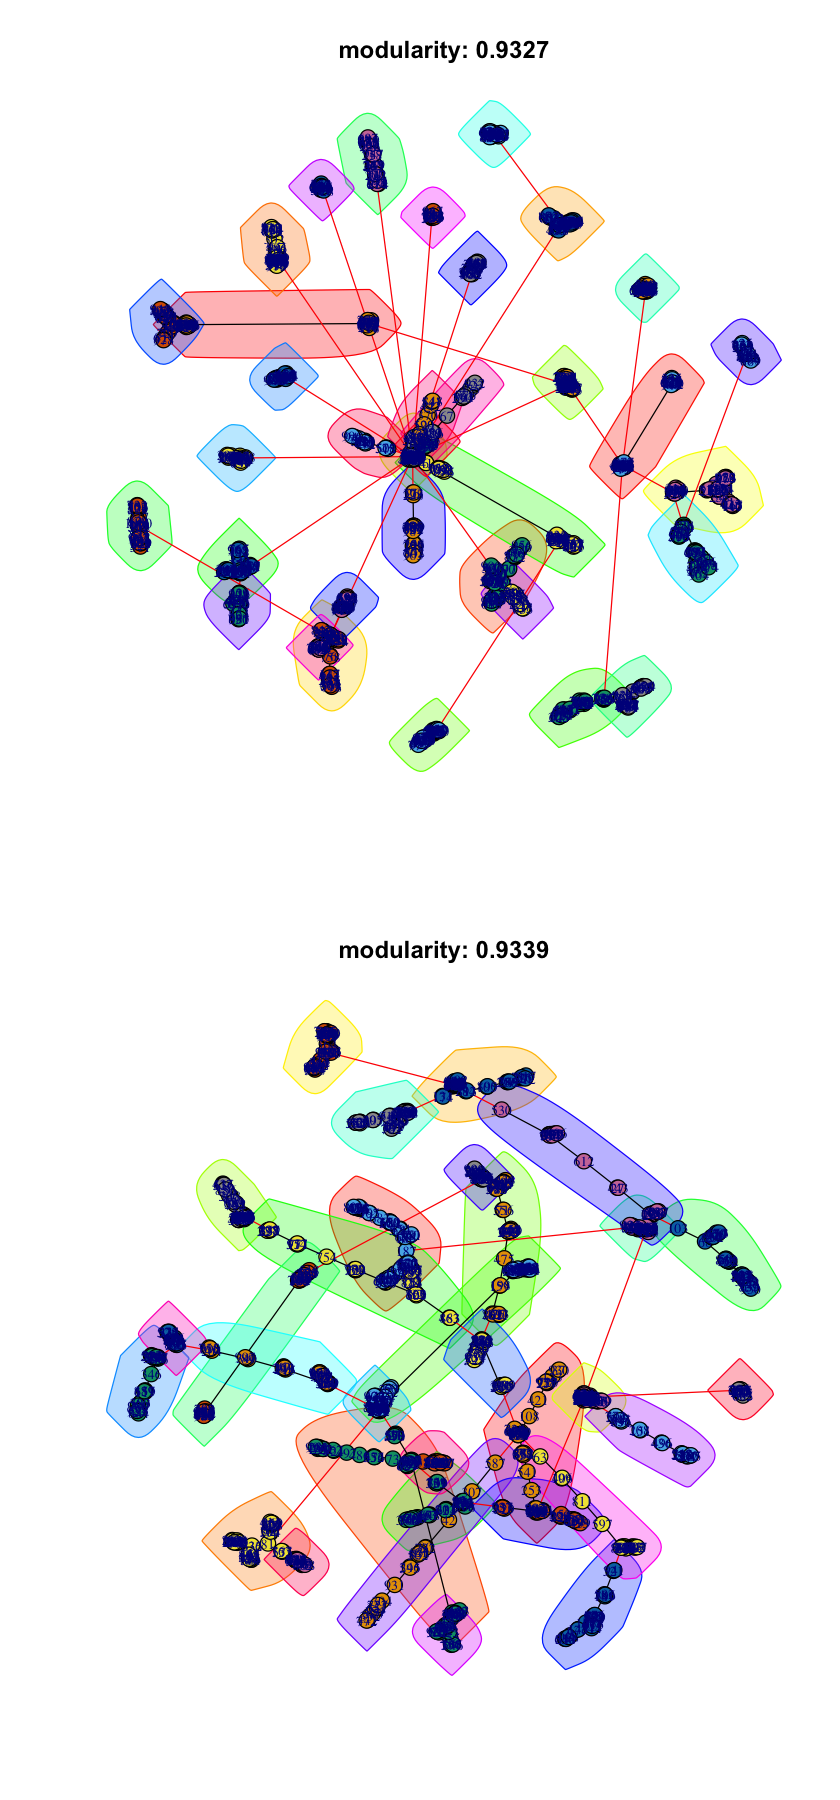

In [106]:
g <- barabasi.game(1000, m=1, directed=F)
g.fg <- fastgreedy.community(g)
g.mod <- round(modularity(g, membership(g.fg)), digits = 4)

sm <- degree.sequence.game(degree(g), method = "vl")
sm.fg <- fastgreedy.community(sm)
sm.mod <- round(modularity(sm, membership(sm.fg)), digits = 4)

par(mfrow = c(2, 1))
options(repr.plot.width=7, repr.plot.height=15)
plot(g.fg, g, vertex.size=5, vertex.label.cex=0.7, main=sprintf("modularity: %s", g.mod))
plot(sm.fg, sm, vertex.size=5, vertex.label.cex=0.7, main=sprintf("modularity: %s", sm.mod))